In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib as mp
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data_dir = 'C:/Users/triet/OneDrive/Documents/DAT301m/Lab1/archive/data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') and logs.get('accuracy') >= 0.81) :
            print('\n reached 81 % accuracy so counceling training')
            self.model.stop_training = True

callback = MyCallback()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.2,
                                    rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1.0/255,
                                    validation_split=0.2)

folder = 'C:/Users/triet/OneDrive/Documents/DAT301m/Lab1/archive/data'
train_generator = train_datagen.flow_from_directory(
        folder,
        subset='training',
        target_size=(512, 512), 
        batch_size=32,
        class_mode='binary')

val_generator = val_datagen.flow_from_directory(
        folder,
        subset='validation',
        target_size=(512, 512),
        batch_size=32,
        class_mode='binary')

Found 129 images belonging to 2 classes.


Found 31 images belonging to 2 classes.


In [8]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 160 files belonging to 2 classes.


In [9]:
data = data.map(lambda x,y: (x/255,y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D , Dense , Flatten , Dropout

In [13]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\triet\OneDrive\Documents\DAT301m\Lab1\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile('adam',
              loss = tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[callback])

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4792 - loss: 1.4197 - val_accuracy: 0.3750 - val_loss: 2.0112
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 978ms/step - accuracy: 0.5091 - loss: 1.3679 - val_accuracy: 0.4062 - val_loss: 0.8410
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 854ms/step - accuracy: 0.4896 - loss: 0.7589 - val_accuracy: 0.6562 - val_loss: 0.6574
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 856ms/step - accuracy: 0.5755 - loss: 0.6705 - val_accuracy: 0.5625 - val_loss: 0.6736
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step - accuracy: 0.5807 - loss: 0.6513 - val_accuracy: 0.5938 - val_loss: 0.6509
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 734ms/step - accuracy: 0.6536 - loss: 0.6072 - val_accuracy: 0.7500 - val_loss: 0.5897
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 777ms/step - accuracy: 0.6406 - loss: 0.6351 - val_accuracy: 0.6250 - val_loss: 0.6509
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 845ms/step - accuracy: 0.6458 - loss: 0.5520 - val_accuracy: 0.6562 - val_loss: 0.

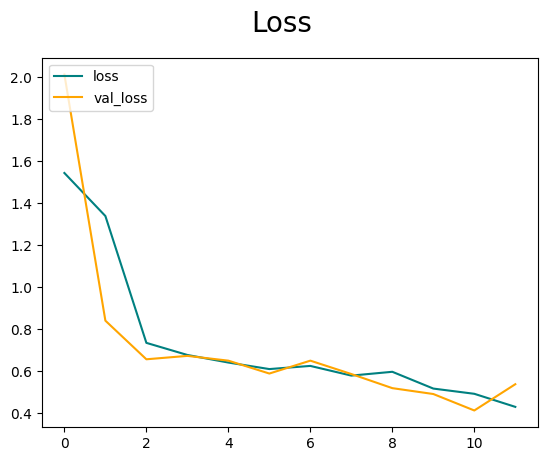

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

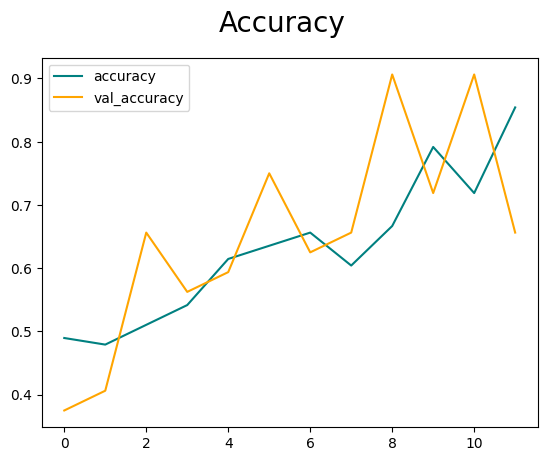

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color ='teal' , label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize =20)
plt.legend(loc="upper left")
plt.show()